In [237]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

plt.rcParams["figure.figsize"] = (10, 7)
from scipy.optimize import curve_fit


In [2]:
# loop through ./data/joined_dataframe, only work with csv files
dirname = os.path.join(os.getcwd(), 'data', 'joined_dataframe')
ext = ('.csv')

files = []
for file in os.listdir(dirname):
    if file.endswith(ext):
        files.append(file)
    else:
        continue
files

['part-00010-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00007-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00011-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00006-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00012-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00009-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00005-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00013-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00008-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00004-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00003-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00014-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00018-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00002-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00015-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00019-146356b5-8cfc-4f8a-a92b-15c0a28fb870-c000.csv',
 'part-00001-146356b5-8c

## Demand Estimation for Black Bottoms

In [314]:

dfs1 = []
for f in files:
    
    df = pd.read_csv(os.path.join(dirname, f))
    black = df[df['colour_group_name_black'] == 1]
    black_bottoms = black[black['product_group_name_garment_lower_body'] ==1]
    dfs1.append(black_bottoms)



In [315]:
all = pd.concat(dfs1)

binned_price = pd.cut(all['price'],10)
v = binned_price.value_counts()

all.columns

Index(['article_id', 'customer_id', 't_dat', 'price', 'sales_channel_id',
       'club_member_status_active', 'club_member_status_left_club',
       'club_member_status_precreate', 'club_member_status_nan',
       'fashion_news_frequency_monthly', 'fashion_news_frequency_regularly',
       'fashion_news_frequency_nan', 'age', 'postal_code',
       'product_group_name_accessories',
       'product_group_name_garment_lower_body',
       'product_group_name_garment_upper_body', 'product_group_name_items',
       'product_group_name_nightwear', 'product_group_name_socks_tights',
       'product_group_name_underwear', 'product_group_name_unknown',
       'graphical_appearance_name_all_over_pattern',
       'graphical_appearance_name_application_3d',
       'graphical_appearance_name_colour_blocking',
       'graphical_appearance_name_denim', 'graphical_appearance_name_dot',
       'graphical_appearance_name_melange',
       'graphical_appearance_name_metallic', 'graphical_appearance_name_so

In [316]:
mids = []
for i in v.index:
    mids.append((i.left + i.right)/2)
for i in all.columns.values:
    print(i)

article_id
customer_id
t_dat
price
sales_channel_id
club_member_status_active
club_member_status_left_club
club_member_status_precreate
club_member_status_nan
fashion_news_frequency_monthly
fashion_news_frequency_regularly
fashion_news_frequency_nan
age
postal_code
product_group_name_accessories
product_group_name_garment_lower_body
product_group_name_garment_upper_body
product_group_name_items
product_group_name_nightwear
product_group_name_socks_tights
product_group_name_underwear
product_group_name_unknown
graphical_appearance_name_all_over_pattern
graphical_appearance_name_application_3d
graphical_appearance_name_colour_blocking
graphical_appearance_name_denim
graphical_appearance_name_dot
graphical_appearance_name_melange
graphical_appearance_name_metallic
graphical_appearance_name_solid
graphical_appearance_name_stripe
graphical_appearance_name_transparent
colour_group_name_beige
colour_group_name_black
colour_group_name_blue
colour_group_name_dark_blue
colour_group_name_dark_gre

In [317]:
vs = v.values
t = np.array(list(zip(mids, vs)))
sort = t[t[:, 0].argsort()]


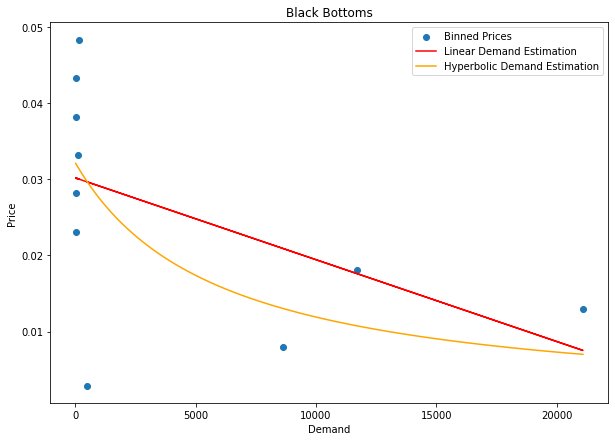

In [318]:

x = sort[:, 1].reshape(-1, 1)
y = sort[:, 0]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, label='Binned Prices')
plt.plot(x, y_pred, label='Linear Demand Estimation', color = 'red')
plt.xlabel('Demand')
plt.ylabel('Price')

x = sort[:, 1]

def hyperbolic_func(x, a, b):
    return a / (1 + b * x * .0001)

params, _ = curve_fit(hyperbolic_func, x, y)

a_fit = params[0]
b_fit = params[1]

x_fit = np.linspace(min(x), max(x), 100)
y_fit = hyperbolic_func(x_fit, a_fit, b_fit)

plt.plot(x_fit, y_fit, label='Hyperbolic Demand Estimation', color = 'orange')


plt.legend()
plt.title("Black Bottoms")
plt.show()


## Demand Estimation for Black Tops


In [345]:
dfs2 = []
for f in files:
    
    df = pd.read_csv(os.path.join(dirname, f))
    black = df[df['colour_group_name_black'] == 1]
    black_tops = black[black['product_group_name_garment_upper_body'] ==1]
    dfs2.append(black_tops)



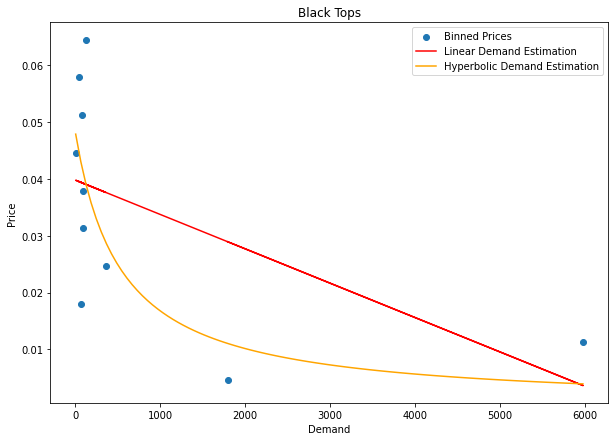

In [363]:
all = pd.concat(dfs2)

binned_price = pd.cut(all['price'],10)
v = binned_price.value_counts()
mids = []
for i in v.index:
    mids.append((i.left + i.right)/2)

vs = v.values
t = np.array(list(zip(mids, vs)))
sort = t[t[:, 0].argsort()]

x = sort[:, 1].reshape(-1, 1)
y = sort[:, 0]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, label='Binned Prices')
plt.plot(x, y_pred, label='Linear Demand Estimation', color = 'red')
plt.xlabel('Demand')
plt.ylabel('Price')

x = sort[:, 1]

def hyperbolic_func(x, a, b):
    return a / (1 + b * x *.00000001)

params, _ = curve_fit(hyperbolic_func, x, y)

a_fit = params[0]
b_fit = params[1]

x_fit = np.linspace(min(x), max(x), 100)
y_fit = hyperbolic_func(x_fit, a_fit, b_fit)

plt.plot(x_fit, y_fit, label='Hyperbolic Demand Estimation', color = 'orange')


plt.legend()
plt.title("Black Tops")
plt.show()


## Demand Estimation for White Tops

In [319]:
dfs = []
for f in files:
    
    df = pd.read_csv(os.path.join(dirname, f))
    white = df[df['colour_group_name_white'] == 1]
    white_tops = white[white['product_group_name_garment_upper_body'] ==1]
    dfs.append(white_tops)

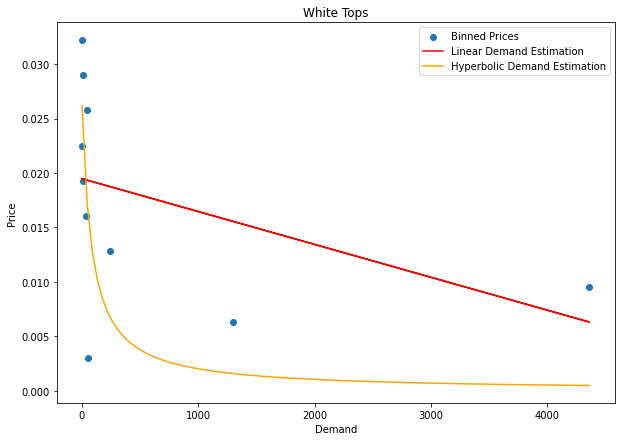

In [364]:
all = pd.concat(dfs)
tot = 0

binned_price = pd.cut(all['price'],10)
v = binned_price.value_counts()
mids = []
for i in v.index:
    mids.append((i.left + i.right)/2)

vs = v.values
t = np.array(list(zip(mids, vs)))
sort = t[t[:, 0].argsort()]

x = sort[:, 1].reshape(-1, 1)
y = sort[:, 0]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, label='Binned Prices')
plt.plot(x, y_pred, label='Linear Demand Estimation', color = 'red')
plt.xlabel('Demand')
plt.ylabel('Price')

x = sort[:, 1]

def hyperbolic_func(x, a, b):
    return a / (1 + b * x * .00000001)

params, _ = curve_fit(hyperbolic_func, x, y)

a_fit = params[0]
b_fit = params[1]

x_fit = np.linspace(min(x), max(x), 100)
y_fit = hyperbolic_func(x_fit, a_fit, b_fit)

plt.plot(x_fit, y_fit, label='Hyperbolic Demand Estimation', color = 'orange')


plt.legend()
plt.title("White Tops")
plt.show()

In [365]:
dfs4 = []
for f in files:
    
    df = pd.read_csv(os.path.join(dirname, f))
    black = df[df['colour_group_name_dark_blue'] == 1]
    black_bottoms = black[black['product_group_name_garment_lower_body'] ==1]
    dfs4.append(black_bottoms)

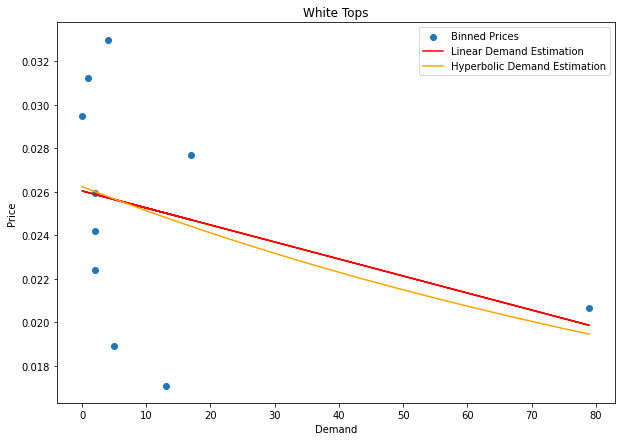

In [374]:
all = pd.concat(dfs4)
tot = 0

binned_price = pd.cut(all['price'],10)
v = binned_price.value_counts()
mids = []
for i in v.index:
    mids.append((i.left + i.right)/2)

vs = v.values
t = np.array(list(zip(mids, vs)))
sort = t[t[:, 0].argsort()]

x = sort[:, 1].reshape(-1, 1)
y = sort[:, 0]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)


plt.scatter(x, y, label='Binned Prices')
plt.plot(x, y_pred, label='Linear Demand Estimation', color = 'red')
plt.xlabel('Demand')
plt.ylabel('Price')

x = sort[:, 1]

def hyperbolic_func(x, a, b):
    return a / (1 + b * x )

params, _ = curve_fit(hyperbolic_func, x, y)

a_fit = params[0]
b_fit = params[1]

x_fit = np.linspace(min(x), max(x), 100)
y_fit = hyperbolic_func(x_fit, a_fit, b_fit)

plt.plot(x_fit, y_fit, label='Hyperbolic Demand Estimation', color = 'orange')


plt.legend()
plt.title("White Tops")
plt.show()